In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%matplotlib inline 
sns.set(font_scale=2.5) 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [11]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# print(df_train.info())
print("------------")
print(df_test.info())

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

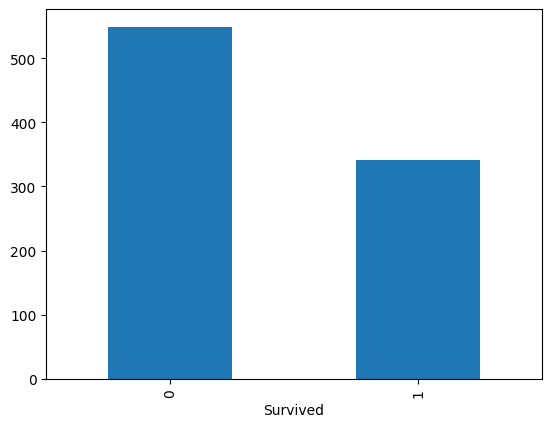

In [25]:
print(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot.bar()

<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>


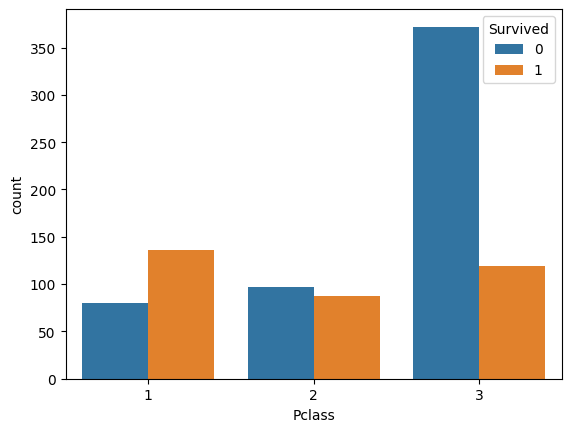

In [29]:
print(df_train['Pclass'].value_counts)
ax = sns.countplot(x='Pclass', hue = 'Survived', data = df_train)

In [34]:
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수 정의
def valid_features(df, col_name, distribution_check = True):

    # 두 집단 (survived = 1, survived = 0)의 분포 그래프 출력
    g = sns.FacetGrid(df, col = 'Survived')
    g.map(plt.hist, col_name, bins = 30)

    # 두 집단 (survived = 1, survived = 0)의 표준편차를 출력
    titanic_survived = df[df['Survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['Survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_n_survived_static))

    # T-test로 두 집단의 평균 차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    print('The t-statistic and p-value aauming equal variances is %.3f and %.3f.' % tTestResult)
    print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f' % tTestResultDiffVar)

    if distribution_check:
        #Shapiro-Wilf 검정 : 분포의 정규성 정도 검증
        print('The w-statistic and p-value in Survived %.3f and %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('The w-statistic and p-value in Non-Survived %.3f and %.3f' % stats.shapiro(titanic_n_survived[col_name]))

In [7]:
valid_features(df_train[df_train['Age'] > 0], 'Age', distribution_check=True)
valid_features(df_train, 'Sibsp', distribution_check=False)

NameError: name 'valid_features' is not defined